In [ ]:
from scipy.stats import norm
import numpy as np
from tabulate import tabulate

# Q1

In [ ]:
# General parameters for the case
days_per_year = 365
holding_cost_per_day = 0.15
transportation_cost_per_unit = 0.19
supply_lead_time_days = 5
review_period_days = 6
CSL = 0.95

# Storing the detailed region and part information from the provided image

region_part_data = {
    'Region 1': {
        'Part 1': {'No': 10, 'Mean': 35.48, 'Std_dev': 6.98},
        'Part 3': {'No': 20, 'Mean': 2.48, 'Std_dev': 3.16},
        'Part 7': {'No': 70, 'Mean': 0.48, 'Std_dev': 1.98}
    },
    'Region 2': {
        'Part 1': {'No': 10, 'Mean': 22.61, 'Std_dev': 6.48},
        'Part 3': {'No': 20, 'Mean': 4.15, 'Std_dev': 6.20},
        'Part 7': {'No': 70, 'Mean': 0.73, 'Std_dev': 1.42}
    },
    'Region 3': {
        'Part 1': {'No': 10, 'Mean': 17.66, 'Std_dev': 5.26},
        'Part 3': {'No': 20, 'Mean': 6.15, 'Std_dev': 6.39},
        'Part 7': {'No': 70, 'Mean': 0.80, 'Std_dev': 2.39}
    },
    'Region 4': {
        'Part 1': {'No': 10, 'Mean': 11.81, 'Std_dev': 3.48},
        'Part 3': {'No': 20, 'Mean': 6.16, 'Std_dev': 6.76},
        'Part 7': {'No': 70, 'Mean': 1.94, 'Std_dev': 3.76}
    },
    'Region 5': {
        'Part 1': {'No': 10, 'Mean': 3.36, 'Std_dev': 4.49},
        'Part 3': {'No': 20, 'Mean': 7.49, 'Std_dev': 3.56},
        'Part 7': {'No': 70, 'Mean': 2.54, 'Std_dev': 3.98}
    }
}

# Print to confirm storage
region_part_data

{'Region 1': {'Part 1': {'No': 10, 'Mean': 35.48, 'Std_dev': 6.98},
  'Part 3': {'No': 20, 'Mean': 2.48, 'Std_dev': 3.16},
  'Part 7': {'No': 70, 'Mean': 0.48, 'Std_dev': 1.98}},
 'Region 2': {'Part 1': {'No': 10, 'Mean': 22.61, 'Std_dev': 6.48},
  'Part 3': {'No': 20, 'Mean': 4.15, 'Std_dev': 6.2},
  'Part 7': {'No': 70, 'Mean': 0.73, 'Std_dev': 1.42}},
 'Region 3': {'Part 1': {'No': 10, 'Mean': 17.66, 'Std_dev': 5.26},
  'Part 3': {'No': 20, 'Mean': 6.15, 'Std_dev': 6.39},
  'Part 7': {'No': 70, 'Mean': 0.8, 'Std_dev': 2.39}},
 'Region 4': {'Part 1': {'No': 10, 'Mean': 11.81, 'Std_dev': 3.48},
  'Part 3': {'No': 20, 'Mean': 6.16, 'Std_dev': 6.76},
  'Part 7': {'No': 70, 'Mean': 1.94, 'Std_dev': 3.76}},
 'Region 5': {'Part 1': {'No': 10, 'Mean': 3.36, 'Std_dev': 4.49},
  'Part 3': {'No': 20, 'Mean': 7.49, 'Std_dev': 3.56},
  'Part 7': {'No': 70, 'Mean': 2.54, 'Std_dev': 3.98}}}

In [ ]:
L = supply_lead_time_days  # Lead time
T = review_period_days  # Review period
Z = norm.ppf(CSL)  # Z-score from CSL
H = holding_cost_per_day  # holding cost
TransCost = transportation_cost_per_unit
days_per_year = 365  # Number of days per year

In [ ]:
def calculate_inventory_metrics(region_part_data):
     # Initialize total annual cost accumulator
    total_annual_cost = 0

    # Recalculate with correct variables
    for region, parts in region_part_data.items():
        for part, details in parts.items():
            mean_demand = details['Mean']
            std_dev = details['Std_dev']

            # Calculate demand variability
            sigma = std_dev * np.sqrt(L + T)

            # Safety Stock Calculation
            safety_stock = Z * sigma

            # Cycle Stock Calculation
            cycle_stock = mean_demand * (T / 2 + L)

            # Inventory Cost per Day
            inventory_cost_per_day = H * (cycle_stock + safety_stock)

            # Transportation Cost per Day
            transportation_cost_per_day = TransCost * mean_demand

            # Per Year
            part_total_per_year = details['No'] * days_per_year * (inventory_cost_per_day + transportation_cost_per_day)

            # Update dictionary with calculated values
            details['Safety_Stock'] = safety_stock
            details['Cycle_Stock'] = cycle_stock
            details['Inventory_Cost_Per_Day'] = inventory_cost_per_day
            details['Transportation_Cost_Per_Day'] = transportation_cost_per_day
            details['Part_Total_Per_Year'] = part_total_per_year

            # Accumulate total annual cost
            total_annual_cost += part_total_per_year

    # Create a list of lists from the dictionary for tabulation
    table_data = [["Region", "Part", "Safety Stock", "Cycle Stock", "Inventory Cost/Day",
                   "Transportation Cost/Day", "Total Cost/Year", "OUL", "Unit Cost/Year",
                   "Days of Inventory", "CV"]]

    for region, parts in region_part_data.items():
        for part, details in parts.items():
            mean_demand = details['Mean']
            std_dev = details['Std_dev']

            # Recalculate with correct variables
            sigma = std_dev * np.sqrt(L + T)
            safety_stock = Z * sigma
            cycle_stock = mean_demand * (T / 2 + L)
            inventory_cost_per_day = H * (cycle_stock + safety_stock)
            transportation_cost_per_day = TransCost * mean_demand
            part_total_per_year = details['No'] * days_per_year * (inventory_cost_per_day + transportation_cost_per_day)

            # Additional Metrics Calculations
            OUL = details['Mean'] * (L + T) + safety_stock
            unit_cost_per_year = (inventory_cost_per_day + transportation_cost_per_day) * days_per_year / mean_demand
            days_of_inventory = (safety_stock + cycle_stock) / mean_demand
            cv = std_dev / mean_demand

            # Update dictionary with calculated values and new metrics
            row = [
                region,
                part,
                round(safety_stock, 2),
                round(cycle_stock, 2),
                round(inventory_cost_per_day, 2),
                round(transportation_cost_per_day, 2),
                round(part_total_per_year, 2),
                round(OUL, 2),
                round(unit_cost_per_year, 2),
                round(days_of_inventory, 2),
                round(cv, 2)
            ]
            table_data.append(row)


    # Display the table
    print(tabulate(table_data, headers="firstrow", tablefmt="grid"))
    print(f"Total Annual Cost Across All Parts: {total_annual_cost}")

# Example usage of the function, ensure `region_part_data` and all constants are defined.
calculate_inventory_metrics(region_part_data)

+----------+--------+----------------+---------------+----------------------+---------------------------+-------------------+--------+------------------+---------------------+------+
| Region   | Part   |   Safety Stock |   Cycle Stock |   Inventory Cost/Day |   Transportation Cost/Day |   Total Cost/Year |    OUL |   Unit Cost/Year |   Days of Inventory |   CV |
+==========+========+================+===============+======================+===========================+===================+========+==================+=====================+======+
| Region 1 | Part 1 |          38.08 |        283.84 |                48.29 |                      6.74 |          200856   | 428.36 |           566.11 |                9.07 | 0.2  |
+----------+--------+----------------+---------------+----------------------+---------------------------+-------------------+--------+------------------+---------------------+------+
| Region 1 | Part 3 |          17.24 |         19.84 |                 5.56 |        

# Q2

In [ ]:
correlation_coefficient = 0  # Placeholder
central_transport_cost = 0.29
total_demand_served = sum(
    details['Mean'] * details['No']
    for region, parts in region_part_data.items()
    for part, details in parts.items()
    if part in ['Part 1', 'Part 3', 'Part 7']
) * days_per_year

warehouse_cost = 50000
total_demand_served

690616.5

In [ ]:
if total_demand_served < 400000:
    CDC_Cost = total_demand_served * 2
else:
    CDC_Cost = 800000 + (total_demand_served - 400000) * 1.5

CDC_Cost

1235924.75

In [ ]:
# Predefined Constants
correlation_coefficients = [0, 0.5, 1]

def calculate_centralized_metrics_with_correlation(region_part_data, correlation_coefficients):
    results = []
    for correlation_coefficient in correlation_coefficients:
        total_cost_all_parts = 0
        table_data = []

        # Initialize centralized data structure
        centralized_data = {
            'Part 1': {'No': 10, 'Total_Mean': 0, 'Total_Std_dev_Squared': 0},
            'Part 3': {'No': 20, 'Total_Mean': 0, 'Total_Std_dev_Squared': 0},
            'Part 7': {'No': 70, 'Total_Mean': 0, 'Total_Std_dev_Squared': 0}
        }

        # Aggregate means and variances (squared standard deviations)
        for region, parts in region_part_data.items():
            for part, details in parts.items():
                centralized_data[part]['Total_Mean'] += details['Mean'] * details['No']
                centralized_data[part]['Total_Std_dev_Squared'] += (details['Std_dev'] ** 2) * details['No']

        # Calculate centralized metrics for each part
        for part, data in centralized_data.items():
            aggregated_mean = data['Total_Mean'] / data['No']
            # Adjust standard deviation calculation for covariance
            total_variance = data['Total_Std_dev_Squared'] / data['No']
            covariance = correlation_coefficient * aggregated_mean ** 2
            aggregated_std_dev = np.sqrt(total_variance + covariance)

            sigma = aggregated_std_dev * np.sqrt(L + T)
            safety_stock = Z * sigma
            cycle_stock = aggregated_mean * (T / 2 + L)
            inventory_cost_per_day = H * (cycle_stock + safety_stock)
            transportation_cost_per_day = central_transport_cost * aggregated_mean
            total_cost_per_year = days_per_year * (inventory_cost_per_day + transportation_cost_per_day) * data['No']

            OUL = safety_stock + (T + L) * aggregated_mean
            unit_cost_per_year = total_cost_per_year / aggregated_mean
            days_of_inventory = (cycle_stock + safety_stock) / aggregated_mean
            cv = aggregated_std_dev / aggregated_mean

            # Append metrics to table data
            table_data.append([
                part,
                round(aggregated_mean, 2),
                round(aggregated_std_dev, 2),
                round(safety_stock, 2),
                round(cycle_stock, 2),
                round(inventory_cost_per_day, 2),
                round(transportation_cost_per_day, 2),
                round(total_cost_per_year, 2),
                round(OUL, 2),
                round(unit_cost_per_year, 2),
                round(days_of_inventory, 2),
                round(cv, 2)
            ])

            total_cost_all_parts += total_cost_per_year

         # Adjust total cost with CDC Cost and warehouse cost
        adjusted_total_cost = total_cost_all_parts + CDC_Cost - 5 * warehouse_cost
        results.append((correlation_coefficient, table_data, adjusted_total_cost))



    # Display results
    for coefficient, table_data, total_cost in results:
        print(f"Correlation Coefficient: {coefficient}")
        print(tabulate(table_data, headers=["Part", "Mean", "Std_dev", "Safety Stock", "Cycle Stock", "Inventory Cost/Day",
                                            "Transportation Cost/Day", "Total Cost/Year", "OUL", "Unit Cost/Year",
                                            "Days of Inventory", "CV"], tablefmt="grid"))
        print(f"Total Annual Cost Across All Parts for Correlation Coefficient {coefficient}: {total_cost}\n")

In [ ]:
calculate_centralized_metrics_with_correlation(region_part_data, correlation_coefficients)

Correlation Coefficient: 0
+--------+--------+-----------+----------------+---------------+----------------------+---------------------------+-------------------+---------+------------------+---------------------+------+
| Part   |   Mean |   Std_dev |   Safety Stock |   Cycle Stock |   Inventory Cost/Day |   Transportation Cost/Day |   Total Cost/Year |     OUL |   Unit Cost/Year |   Days of Inventory |   CV |
+========+========+===========+================+===============+======================+===========================+===================+=========+==================+=====================+======+
| Part 1 |  90.92 |     12.27 |          66.96 |        727.36 |               119.15 |                     26.37 |            531128 | 1067.08 |          5841.71 |                8.74 | 0.13 |
+--------+--------+-----------+----------------+---------------+----------------------+---------------------------+-------------------+---------+------------------+---------------------+------+
| P

The initial cost for constructing a CDC is super high that's why the cost is significantly higher than that of regionally separated system.

However, the unit cost is significantly lower than the regional one when correlation coefficient is lower than 50%. Therefore, our recommendation is that, if the correlation coefficient is significantly low, we prefer the centralized option because the cost will be smaller for the centralized option in the long run.

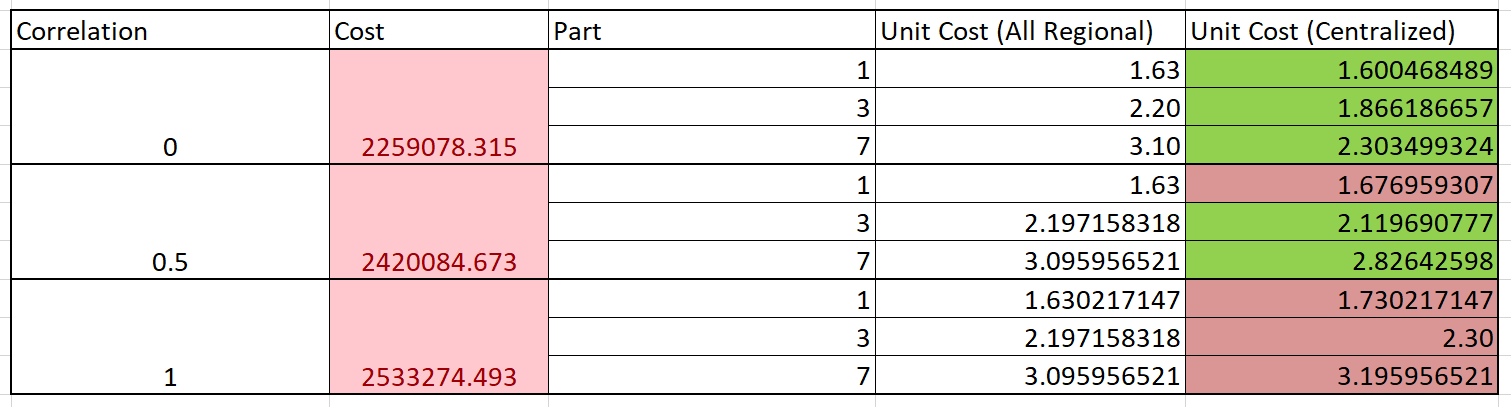

#Q3

In [ ]:
%reset -f
%clear
import numpy as np
import pandas as pd
import math
import scipy.stats as st
from scipy.optimize import minimize

### Set display options for comma separator and precision
pd.options.display.float_format = '{:,.2f}'.format

# Define the date you want to check
days = 365  # days_per_year
h   = 0.15  # holding_cost_per_day
tc  = 0.19  # transportaion_cost_per_unit
ctc = 0.29  # centralized transportaion_cost_per_unit
L   = 5     # supply_leadtime_days
T   = 6     # review_period_days
csl = 0.95  # critical value
warehouse_salvage = 50000

corr = 0
# Prompt the user to enter a value for 'corr'
#corr = float(input("Enter correlation (as scalar): "))

### Rawdata: average demand and standard deviation of demand for each part in each region
avg_demand = np.array([[35.48, 22.61, 17.66, 11.81,  3.36],
                       [ 2.48,  4.15,  6.15,  6.16,  7.49],
                       [ 0.48,  0.73,  0.80,  1.94,  2.54]])

std_demand = np.array([[ 6.98,  6.48,  5.26,  3.48,  4.49],
                       [ 3.16,  6.20,  6.39,  6.76,  3.56],
                       [ 1.98,  1.42,  2.39,  3.76,  3.98]])

num_demand = np.array([[ 10, 10, 10, 10, 10],
                       [ 20, 20, 20, 20, 20],
                       [ 70, 70, 70, 70, 70]])

n_parts, n_regions = avg_demand.shape[0], avg_demand.shape[1]

### create correlation matrix using provided scalar value (corr can also be provided as raw data)
corr_matrix = np.full((n_regions, n_regions), corr)
np.fill_diagonal(corr_matrix, 1) # Set diagonal elements to 1

%clear

# Objective function to maximize (using matrix calculations)
def objective_function(flat_matrix):

    centralize = flat_matrix.reshape((3, 5))     # Reshape the flattened matrix to 3x5

    ### Compute aggregate standard deviation for centralized choices
    agg_std_demand = np.diag( np.dot( np.dot( np.multiply(std_demand, centralize), corr_matrix), np.transpose( np.multiply(std_demand, centralize) ) ) )
    sqrt_agg_std_demand = np.sqrt(agg_std_demand)

    sum_columns = np.sum(centralize, axis=1, keepdims=True)
    sum_columns[sum_columns == 0] = 1  # Avoid division by zero
    sum_columns_inv = 1 / sum_columns  # Inverse of the sum for normalization

    ### Adjust the standard deviation by dividing number of centralized regions for each part
    sqrt_agg_std_demand2 = np.repeat(sqrt_agg_std_demand.reshape(n_parts, 1), n_regions, axis=1)
    sum_columns_inv2 = np.repeat(sum_columns_inv.reshape(n_parts, 1), n_regions, axis=1)

    std_demand_updated = np.array( centralize * sum_columns_inv2 * sqrt_agg_std_demand2 + (1 - centralize) * std_demand )

    # Count how many columns have all 1's indicating total centralization for that region
    columns_all_ones = np.all(centralize == 1, axis=0).sum()

    # Calculate the total cost considering the salvage value from closing warehouses
    total_cost = sum(
        days * num_demand[i, j] *
        (h * ( st.norm.ppf(csl) * std_demand_updated[i, j] * math.sqrt(T + L) + avg_demand[i, j] * (T/2 + L) )
        + ( avg_demand[i, j] * ( centralize[i, j] * ctc + (1 - centralize[i, j]) * tc ) )
        ) for i in range(n_parts) for j in range(n_regions) ) - columns_all_ones * warehouse_salvage

    return total_cost  # Return total cost (minimization problem)



In [ ]:
# Initial guess for decision variables
initial_guess = np.full((n_parts, n_regions), 0.5)
initial_guess_flat = initial_guess.flatten()
centralize = initial_guess_flat.reshape((3, 5))
centralize

array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5]])

In [ ]:
# Initial guess for decision variables
initial_guess = np.full((n_parts, n_regions), 0.5)
initial_guess_flat = initial_guess.flatten()     # Flatten the initial guess for use in optimization

# Bounds for decision variables (between 0 and 1)
bounds = [(0, 1)] * (n_parts*n_regions)

# Custom constraint enforcing the sum of each group (of 5) to not equal 1
def binary_constraints(x):
    # Binary constraint
    return [xi * (1 - xi) for xi in x]   # Forcing xi to be close to 0 or 1
    # return x - 0.5

# Constraints argument
constraints = ({'type': 'ineq', 'fun': binary_constraints})

# Optimization using minimize function from scipy
result = minimize(objective_function, initial_guess_flat, bounds=bounds, constraints=constraints)

# Extract the optimal solution as a 3x5 matrix
optimal_soln_mat = np.round((result.x).reshape((n_parts, n_regions)))

cdc_cost = days * sum( (num_demand[i, j] * avg_demand[i, j] * optimal_soln_mat[i, j]) for i in range(n_parts) for j in range(n_regions) )
investment = cdc_cost * 2 if cdc_cost <= 400000 else (800000 + (cdc_cost - 400000) * 1.5)

# Print the optimal solution as a 3x5 matrix
print("Correlation :", corr)
print(f"Minimum cost: ${(result.fun):>13,.2f}")
print(f"CDC cost    : ${cdc_cost:>13,.2f}")
print(f"Investment  : ${investment:>13,.2f}")
print("\nOptimal Solution:\n   R1   R2   R3   R4   R5")
for part in optimal_soln_mat:
    print(" ".join(f"{int(region):4}" for region in part))

Correlation : 0
Minimum cost: $ 1,074,546.19
CDC cost    : $   561,114.50
Investment  : $ 1,041,671.75

Optimal Solution:
   R1   R2   R3   R4   R5
   0    1    1    1    1
   1    1    1    1    1
   1    1    1    1    1


In [ ]:
corr = 0.5

### create correlation matrix using provided scalar value (corr can also be provided as raw data)
corr_matrix = np.full((n_regions, n_regions), corr)
np.fill_diagonal(corr_matrix, 1) # Set diagonal elements to 1

# Initial guess for decision variables
initial_guess = np.full((n_parts, n_regions), 0.5)
initial_guess_flat = initial_guess.flatten()     # Flatten the initial guess for use in optimization

# Bounds for decision variables (between 0 and 1)
bounds = [(0, 1)] * (n_parts*n_regions)

# Custom constraint enforcing the sum of each group (of 5) to not equal 1
def binary_constraints(x):
    # Binary constraint
    return [xi * (1 - xi) for xi in x]   # Forcing xi to be close to 0 or 1
    # return x - 0.5

# Constraints argument
constraints = ({'type': 'ineq', 'fun': binary_constraints})

# Optimization using minimize function from scipy
result = minimize(objective_function, initial_guess_flat, bounds=bounds, constraints=constraints)

# Extract the optimal solution as a 3x5 matrix
optimal_soln_mat = np.round((result.x).reshape((n_parts, n_regions)))

cdc_cost = days * sum( (num_demand[i, j] * avg_demand[i, j] * optimal_soln_mat[i, j]) for i in range(n_parts) for j in range(n_regions) )
investment = cdc_cost * 2 if cdc_cost <= 400000 else (800000 + (cdc_cost - 400000) * 1.5)

# Print the optimal solution as a 3x5 matrix
print("Correlation :", corr)
print(f"Minimum cost: ${(result.fun):>13,.2f}")
print(f"CDC cost    : ${cdc_cost:>13,.2f}")
print(f"Investment  : ${investment:>13,.2f}")
print("\nOptimal Solution:\n   R1   R2   R3   R4   R5")
for part in optimal_soln_mat:
    print(" ".join(f"{int(region):4}" for region in part))

Correlation : 0.5
Minimum cost: $ 1,418,648.16
CDC cost    : $   358,758.50
Investment  : $   717,517.00

Optimal Solution:
   R1   R2   R3   R4   R5
   0    0    0    0    0
   1    1    1    1    1
   1    1    1    1    1


In [ ]:
corr = 1

### create correlation matrix using provided scalar value (corr can also be provided as raw data)
corr_matrix = np.full((n_regions, n_regions), corr)
np.fill_diagonal(corr_matrix, 1) # Set diagonal elements to 1

# Initial guess for decision variables
initial_guess = np.full((n_parts, n_regions), 0.5)
initial_guess_flat = initial_guess.flatten()     # Flatten the initial guess for use in optimization

# Bounds for decision variables (between 0 and 1)
bounds = [(0, 1)] * (n_parts*n_regions)

# Custom constraint enforcing the sum of each group (of 5) to not equal 1
def binary_constraints(x):
    # Binary constraint
    return [xi * (1 - xi) for xi in x]   # Forcing xi to be close to 0 or 1
    # return x - 0.5

# Constraints argument
constraints = ({'type': 'ineq', 'fun': binary_constraints})

# Optimization using minimize function from scipy
result = minimize(objective_function, initial_guess_flat, bounds=bounds, constraints=constraints)

# Extract the optimal solution as a 3x5 matrix
optimal_soln_mat = np.round((result.x).reshape((n_parts, n_regions)))

cdc_cost = days * sum( (num_demand[i, j] * avg_demand[i, j] * optimal_soln_mat[i, j]) for i in range(n_parts) for j in range(n_regions) )
investment = cdc_cost * 2 if cdc_cost <= 400000 else (800000 + (cdc_cost - 400000) * 1.5)

# Print the optimal solution as a 3x5 matrix
print("Correlation :", corr)
print(f"Minimum cost: ${(result.fun):>13,.2f}")
print(f"CDC cost    : ${cdc_cost:>13,.2f}")
print(f"Investment  : ${investment:>13,.2f}")
print("\nOptimal Solution:\n   R1   R2   R3   R4   R5")
for part in optimal_soln_mat:
    print(" ".join(f"{int(region):4}" for region in part))

Correlation : 1
Minimum cost: $ 1,478,288.09
CDC cost    : $         0.00
Investment  : $         0.00

Optimal Solution:
   R1   R2   R3   R4   R5
   0    0    0    0    0
   0    0    0    0    0
   0    0    0    0    0


Some simulations with different coefficients

<ipython-input-60-2cedf85d337f>:54: RuntimeWarning: invalid value encountered in sqrt
  sqrt_agg_std_demand = np.sqrt(agg_std_demand)


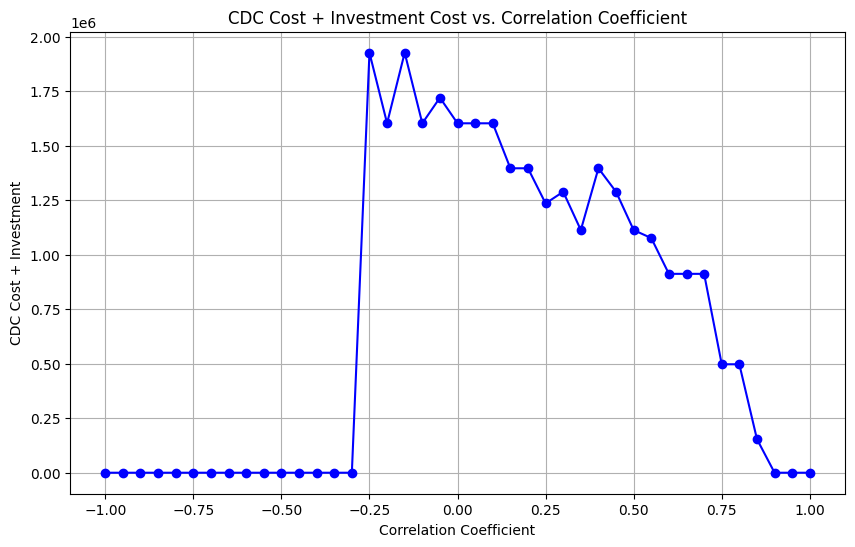

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store correlation values and total costs
correlation_values = []
total_costs = []

# Loop through different correlation values
for corr in np.arange(-1, 1.05, 0.05):  # Adjust step size as needed
    correlation_values.append(corr)  # Correctly adding the correlation value

    # Create correlation matrix
    corr_matrix = np.full((n_regions, n_regions), corr)
    np.fill_diagonal(corr_matrix, 1)  # Diagonal elements are 1

    # Initial guess for decision variables
    initial_guess = np.full((n_parts, n_regions), 0.5).flatten()

    # Optimization
    result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints)

    # Extract the optimized solution as a matrix
    optimal_soln_mat = np.round(result.x.reshape((n_parts, n_regions)))

    # Calculate costs
    cdc_cost = days * sum(num_demand[i, j] * avg_demand[i, j] * optimal_soln_mat[i, j] for i in range(n_parts) for j in range(n_regions))
    investment = cdc_cost * 2 if cdc_cost <= 400000 else (800000 + (cdc_cost - 400000) * 1.5)

    # Calculate total costs and append to the list
    total_cost = cdc_cost + investment
    total_costs.append(total_cost)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(correlation_values, total_costs, '-o', color='blue')
plt.title('CDC Cost + Investment Cost vs. Correlation Coefficient')
plt.xlabel('Correlation Coefficient')
plt.ylabel('CDC Cost + Investment')
plt.grid(True)
plt.show()

This indicates that it only makes sense to centralize any regions if the correlation coefficient is between -0.3 to 0.9

<ipython-input-60-2cedf85d337f>:54: RuntimeWarning: invalid value encountered in sqrt
  sqrt_agg_std_demand = np.sqrt(agg_std_demand)


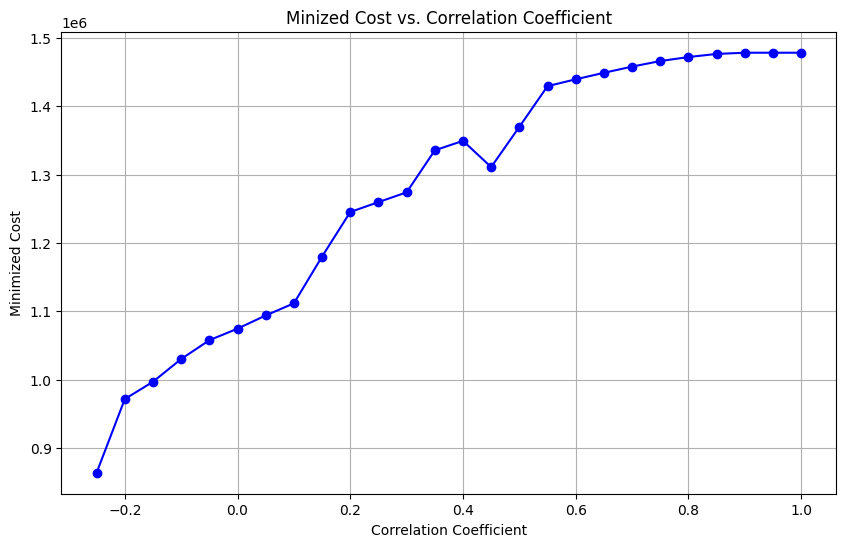

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize dictionary to store frequency of each matrix configuration
matrix_config_frequency = defaultdict(int)
config_costs = defaultdict(list)

# Initialize lists to store correlation values and minimized costs
correlation_values = []
minimized_costs = []

# Loop through different correlation values
for corr in np.arange(-1, 1.05, 0.05):  # Adjust step size as needed
    correlation_values.append(corr)  # Correctly adding the correlation value

    # Create correlation matrix
    corr_matrix = np.full((n_regions, n_regions), corr)
    np.fill_diagonal(corr_matrix, 1)  # Diagonal elements are 1

    # Initial guess for decision variables
    initial_guess = np.full((n_parts, n_regions), 0.5).flatten()

    # Optimization
    result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints)

    # Extract the optimized solution as a matrix
    optimal_soln_mat = np.round(result.x.reshape((n_parts, n_regions)))

    # Calculate costs
    cdc_cost = days * sum(num_demand[i, j] * avg_demand[i, j] * optimal_soln_mat[i, j] for i in range(n_parts) for j in range(n_regions))
    investment = cdc_cost * 2 if cdc_cost <= 400000 else (800000 + (cdc_cost - 400000) * 1.5)

    # Store the minimized cost and append to the list
    minimized_costs.append(result.fun)

    # Convert matrix to a tuple and increase its count in the dictionary
    matrix_config_tuple = tuple(map(tuple, optimal_soln_mat))
    matrix_config_frequency[matrix_config_tuple] += 1
    config_costs[matrix_config_tuple].append(result.fun)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(correlation_values, minimized_costs, '-o', color='blue')
plt.title('Minized Cost vs. Correlation Coefficient')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Minimized Cost')
plt.grid(True)
plt.show()

In [ ]:
# Sort the configurations by frequency (highest first)
sorted_config_freq = sorted(matrix_config_frequency.items(), key=lambda item: item[1], reverse=True)

print("Statistics for each matrix configuration, ranked by frequency:")
for rank, (config, freq) in enumerate(sorted_config_freq, start=1):
    costs = config_costs[config]
    average_cost = np.mean(costs)
    stdev_cost = np.std(costs)
    print(f"Rank {rank}, Configuration {config}: {freq} times, Average Cost: {average_cost}, Std Dev: {stdev_cost}")

Statistics for each matrix configuration, ranked by frequency:
Rank 1, Configuration ((0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0)): 18 times, Average Cost: nan, Std Dev: nan
Rank 2, Configuration ((0.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0)): 5 times, Average Cost: 1056353.8778989478, Std Dev: 50331.89748777282
Rank 3, Configuration ((0.0, 0.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0)): 3 times, Average Cost: 1258234.279812109, Std Dev: 69712.16039969256
Rank 4, Configuration ((0.0, 0.0, 0.0, 0.0, 0.0), (1.0, 1.0, 1.0, 1.0, 0.0), (1.0, 1.0, 1.0, 1.0, 1.0)): 3 times, Average Cost: 1448770.7088244949, Std Dev: 7587.172732060907
Rank 5, Configuration ((1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0)): 2 times, Average Cost: 930303.3462082727, Std Dev: 66544.61768584838
Rank 6, Configuration ((0.0, 0.0, 1.0, 0.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0,

Based on our findings, if the company is confident that the correlation coefficient of demand is between -0.25 and 0.75, then they should centralize distribution for all products in regions 2, 3, 4, and 5, while centralizing products 3 and 7 for region 1. This would mean that the only product left in a regional distribution center would be product 1 in region 1.

However, if Alko is not confident that the correlation coefficient of demand will be within that range, or if they're not confident in their ability to accurately deduce the correlation coefficient, they should not centralize any of their distribution, and continue to use the regional distribution configuration they currently have.

The main concern is that if the correlation coeffecient of demand is high between regions, then